# Ejecicio - Series temporales aleatorias y caóticas

El objetivo de este ejercicio es analizar dos series de datos provistas (*data1.txt* y *data2.txt*) para evaluar si se pueden distinguir datos de tipo aleatorio de los generados mediante transformaciones deterministas.

In [61]:
# import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import data to study
data1 = np.genfromtxt("../data/data1.txt")
data2 = np.genfromtxt("../data/data2.txt")

## Comparación

En primer lugar, se van a comparar las dos series $x(n)$ en función de $n$, para ver si se pueden apreciar diferencias cualitativas en su evolución temporal temporal. Dado que se dispone de 10169 puntos para cada serie, las dos señales no se pueden comparar de forma grafica para todo el rango de $n$ sino que se va a realizar la comparacion en rangos temporales más cortos (i.e. $1\leq n \leq 500$):

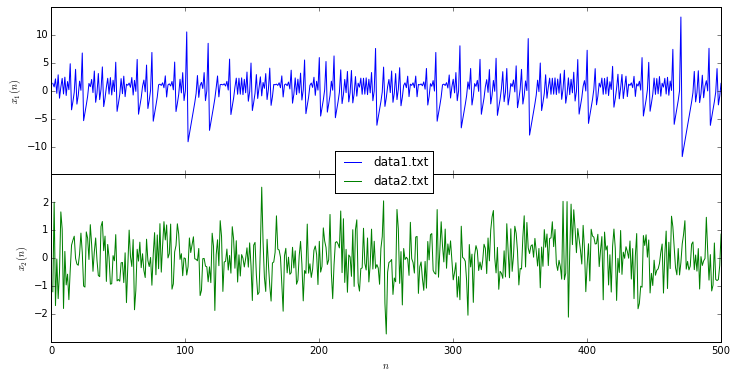

In [62]:
# n ranges (from 1 to 10169)
n_min = 1
n_max = 500
# plot figure with same axis
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 6))
f.subplots_adjust(hspace=0) # no space between plots
# hide labels in joint axis
f.axes[0].get_yticklabels()[0].set_visible(False)
f.axes[1].get_yticklabels()[-0].set_visible(False)
# plot data and set axis
n_values = np.linspace(n_min, n_max , n_max-n_min+1)
line1, = ax1.plot(n_values, data1[n_min-1:n_max], "b")
ax1.set_xlabel(u"$n$")
ax1.set_ylabel(u"$x_1(n)$")
line2, = ax2.plot(n_values, data2[n_min-1:n_max], "g")
ax2.set_xlabel(u"$n$")
ax2.set_ylabel(u"$x_2(n)$")
# legend (backgroud white)
leg = f.legend((line1, line2), ('data1.txt', 'data2.txt'), loc=(0.455,0.49), frameon = True)
frame = leg.get_frame()
frame.set_facecolor('white')

Se observa una evolución temporal muy diferente en cada serie de datos. Para la primeria serie de datos, se aprecia qualitativamente cierta estructura periodica. Por ejemplo, para ciertos $n$ (e.g. en $n \approx 250$, se produce una la repetición aproximada de un patron temporal en tres ocasiones, lo que es altamente improbable en un proceso aleatorio. Para la segunda serie de datos sin embargo no se aprecia una ninguna estructura o periodicidad.

A continuación, se va a realizar un histograma de los valores de cada una de las series de datos, para observar posibles discrepancias en sus distribuciones.

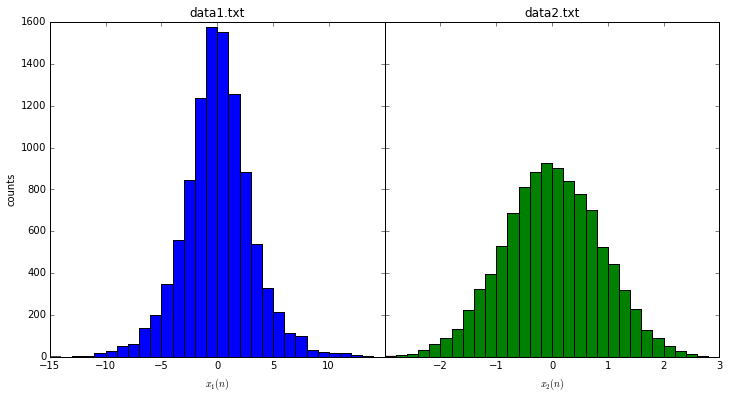

In [63]:
# plot figure
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
n1, bins1, patches1 = ax1.hist(data1, color="b", bins = 30, range = (-15, 15))
ax1.set_title("data1.txt")
ax2.set_title("data2.txt")
ax1.set_xlabel(u"$x_{1}(n)$")
ax2.set_xlabel(u"$x_{2}(n)$")
ax1.set_ylabel("counts")
n2, bins2, patches2 = ax2.hist(data2, color="g", bins = 30, range = (-3,3))
# hide labels in joint axis
f.subplots_adjust(wspace=0)
f.axes[0].get_xticklabels()[-1].set_visible(False)
f.axes[1].get_xticklabels()[0].set_visible(False)

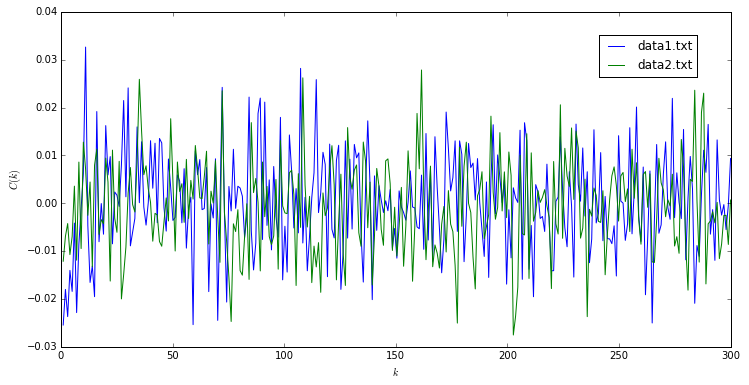

In [64]:
# function to estimate normalized autocorrelation
def autocorr(x):
    corr = np.correlate(x, x, mode='full')
    return corr[corr.size/2:]/corr.max()

# k ranges (from 0 to 10168)
k_min = 1
k_max = 300
# plot autocorrelation function for both series
f, (ax1) = plt.subplots(1, figsize = (12,6))
ax1.set_xlabel(u"$k$")
ax1.set_ylabel(u"$C(k)$")
line1, = plt.plot(np.linspace(k_min,k_max,k_max-k_min), autocorr(data1)[k_min:k_max])
line2, = plt.plot(np.linspace(k_min,k_max,k_max-k_min), autocorr(data2)[k_min:k_max])
leg = f.legend((line1, line2), ('data1.txt', 'data2.txt'), loc=(0.8,0.8))

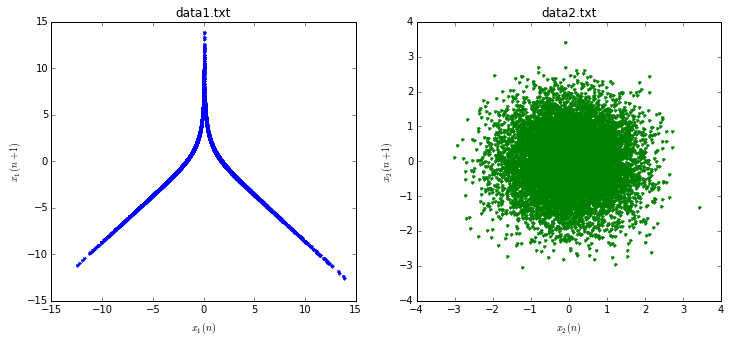

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
title1 = ax1.set_title("data1.txt")
line1, = ax1.plot(data1[0:-1], data1[1:], "b.")
xlabel1 = ax1.set_xlabel(u"$x_1(n)$")
ylabel1 = ax1.set_ylabel(u"$x_1(n+1)$")
title2 = ax2.set_title("data2.txt")
line2, = ax2.plot(data2[0:-1], data2[1:], "g.")
xlabel1 = ax2.set_xlabel(u"$x_2(n)$")
ylabel2 = ax2.set_ylabel(u"$x_2(n+1)$")